In [24]:
import numpy as np
import csv 
import matplotlib.pyplot as plt

In [25]:
filepath='/india_covid19.csv'

date=[]
newdeath=[]   #y
datemap=[]    #x
count=0
rf=12026
with open(filepath, mode ='r') as file:     
   csvFile = csv.reader(file) 
   for lines in csvFile:
     if count==0:
       count=count+1
       continue
     if (lines[1]>='2020-05-01') & (lines[1]<='2020-05-31'):
       newdeath.append(int(lines[7]))
       date.append(lines[1])
       datemap.append(int(lines[0])-rf)

# print(date)
# print(datemap)
# print(newdeath)



In [26]:
#predict the number of  deaths on April 20, 2020 and June 10th , 2020.

# 2020-04-20, 2020-06-10
query_date=[]
query_death=[]
query_mapdate=[]
with open(filepath, mode ='r') as file:
  csvFile = csv.reader(file) 
  for lines in csvFile:
    if (lines[1]=='2020-04-20') | (lines[1]=='2020-06-10'):
      query_date.append(lines[1])
      query_death.append(int(lines[7]))
      query_mapdate.append(int(lines[0])-rf)

q_md=np.array(query_mapdate)

In [27]:
m=22    # days used for training the model
X=np.array(datemap)
X_train=X[0:m]
Y=np.array(newdeath)
Y_train=Y[0:m]
# print(X_train)
# print(Y_train)
X_test=X[m:]
Y_test=Y[m:]
darry=np.array(date)
X_testdate=darry[m:]
# print(X_test)
# print(Y_test)

In [28]:
a=np.sum(X_train)        # SUM OF X
b=np.sum(Y_train)        # SUM OF Y
# print(a)
# print(b)
sq=np.square(X_train)    # SUM OF SQUARE OF X_TRAIN
c=np.sum(sq)
mul=np.multiply(X_train,Y_train)
d=np.sum(mul)            # SUM OF X_train * Y_train
# print(c)
# print(d)
cub= np.multiply(X_train,sq)
# print(cub)
e=np.sum(cub)            # sum of X^3
mulxsq=np.multiply(sq,Y_train)
f=np.sum(mulxsq)         # sum of X^2 * Y
fopow= np.multiply(sq,sq)
g=np.sum(fopow)          # sum of X^4
# print(e)
# print(f)
# print(g)

**LINEAR REGRESSION**

In [29]:
# linear eqn line  Y=w0 + w1*X
# decompose to solve w0 and w1
#  m*w0 + a*w1 = b
#  a*w0 + c*w1 = d

A=np.array([[m,a],[a,c]])
B=np.array([b,d])
ans = np.linalg.solve(A, B)
# print(ans)

w0=ans[0]
w1=ans[1]

In [30]:
Y_linearpred=[]
Y_linearpred=w1*X_test + w0
print("Test Dates   |    Actual Deaths |     Predicted Deaths")
print(" ")
for i in range(len(Y_test)):
  print(X_testdate[i],"          ",Y_test[i],"          ",Y_linearpred[i])

Test Dates   |    Actual Deaths |     Predicted Deaths
 
2020-05-23            137            142.25974025974074
2020-05-24            147            144.71315640880908
2020-05-25            154            147.16657255787743
2020-05-26            146            149.61998870694583
2020-05-27            170            152.07340485601418
2020-05-28            194            154.52682100508252
2020-05-29            175            156.98023715415093
2020-05-30            265            159.43365330321927
2020-05-31            193            161.88706945228768


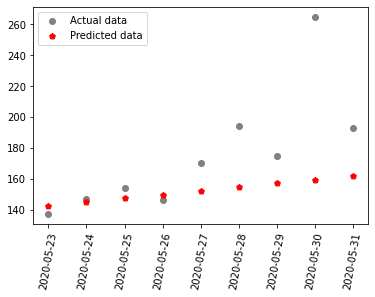

In [31]:
plt.xticks(rotation=80)
plt.scatter(X_testdate, Y_test,  color='gray',label="Actual data",marker='o')
plt.legend()
plt.scatter(X_testdate, Y_linearpred, color='red',label="Predicted data",marker='p')
plt.legend()

Accuracy of prediction

In [32]:
error_diff=np.subtract(Y_test,Y_linearpred)
abserror_diff=np.absolute(error_diff)
absolute_error=np.sum(error_diff)
mean_ab_error=absolute_error/9
print("ACCURACY OF PREDICTION")
print(" ")
print(mean_ab_error)

ACCURACY OF PREDICTION
 
23.593261810652482


Predict the number of  deaths on April 20, 2020 and June 10th , 2020 using linear regression


In [33]:
query_lineardeathpred=[]
query_lineardeathpred=w1*q_md + w0
print("Test Dates   |    Actual Deaths |     Predicted Deaths")
print(" ")
for i in range(len(query_date)):
  print(query_date[i],"          ",query_death[i],"          ",query_lineardeathpred[i])



Test Dates   |    Actual Deaths |     Predicted Deaths
 
2020-04-20            36            61.29700734048464
2020-06-10            279            186.4212309429713


**QUADRATIC EQN**


In [34]:
# linear eqn line  Y=w0 + w1*X + w2*X^2
# decompose to solve w0 and w1 and w2
#  m*w0 + aa*w1 + cc*w2 = bb
#  aa*w0 + cc*w1 + e*w2 = dd
#  cc*w0 + e*w1 + g*w2 = f

A=np.array([[m,a,c],[a,c,e],[c,e,g]])
B=np.array([b,d,f])
ans = np.linalg.solve(A, B)
# print(ans)

w0=ans[0]
w1=ans[1]
w2=ans[2]

In [35]:
Y_quadraticpred=[]
X_testsq=np.square(X_test)
Y_quadraticpred=w1*X_test + w0 + w2*X_test*X_test
print("Test Dates   |    Actual Deaths |     Predicted Deaths")
print(" ")
for i in range(len(Y_test)):
  print(X_testdate[i],"          ",Y_test[i],"          ",Y_quadraticpred[i])



Test Dates   |    Actual Deaths |     Predicted Deaths
 
2020-05-23            137            142.6688311688479
2020-05-24            147            145.2289666855096
2020-05-25            154            147.79799548280408
2020-05-26            146            150.37591756073132
2020-05-27            170            152.96273291929134
2020-05-28            194            155.55844155848422
2020-05-29            175            158.16304347830982
2020-05-30            265            160.7765386787682
2020-05-31            193            163.3989271598594


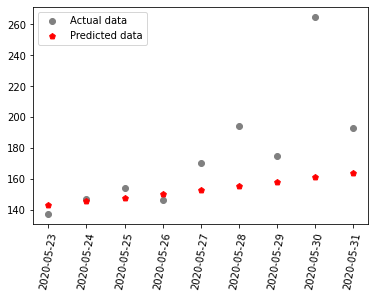

In [36]:
plt.xticks(rotation=80)
plt.scatter(X_testdate, Y_test,  color='gray',label="Actual data",marker='o')
plt.legend()
plt.scatter(X_testdate, Y_quadraticpred, color='red',label="Predicted data",marker='p')
plt.legend()

Accuracy of Prediction

In [37]:
error_diff=np.subtract(Y_test,Y_quadraticpred)
abserror_diff=np.absolute(error_diff)
absolute_error=np.sum(error_diff)
mean_ab_error=absolute_error/9
print("ACCURACY OF PREDICTION")
print(" ")
print(mean_ab_error)

ACCURACY OF PREDICTION
 
22.67428947859935


Predict the number of deaths on April 20, 2020 and June 10th , 2020 using quadratic regression

In [38]:
query_quaddeathpred=[]
query_quaddeathpred=w2*q_md*q_md + w1*q_md + w0
print("Test Dates   |    Actual Deaths |     Predicted Deaths")
print(" ")
for i in range(len(query_date)):
  print(query_date[i],"          ",query_death[i],"          ",query_quaddeathpred[i])
# print(query_quaddeathpred)
# print(query_death)

Test Dates   |    Actual Deaths |     Predicted Deaths
 
2020-04-20            36            63.173489554003666
2020-06-10            279            190.11194240557427
